# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [ ]:
data=pd.read_csv("Dry_Bean_Dataset1111.csv")

#  Display the rows of the dataset

In [ ]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
print(data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

In [ ]:
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# Encoding Class Labels

In [ ]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(data['Class']))}
data['Class'] = data['Class'].map(class_mapping)

# Extracting the features and target variables

In [ ]:
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Creating a randomized train-test split of the dataset

In [ ]:
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

#  Splitting data into training and testing sets

In [ ]:
X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]

# Standardizing the training and test sets

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

# Implementing K-Nearest Neighbors (KNN)

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

# Evaluating the model for different values of k

In [ ]:
ks = [1, 3, 5, 7, 9, 11, 13, 15]
accuracy_per_k = []

for k in ks:
    y_pred = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracy_per_k.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

Accuracy for k=1: 0.90
Accuracy for k=3: 0.92
Accuracy for k=5: 0.92
Accuracy for k=7: 0.92
Accuracy for k=9: 0.93
Accuracy for k=11: 0.92
Accuracy for k=13: 0.93
Accuracy for k=15: 0.92


# Visualizing the accuracy for different k values

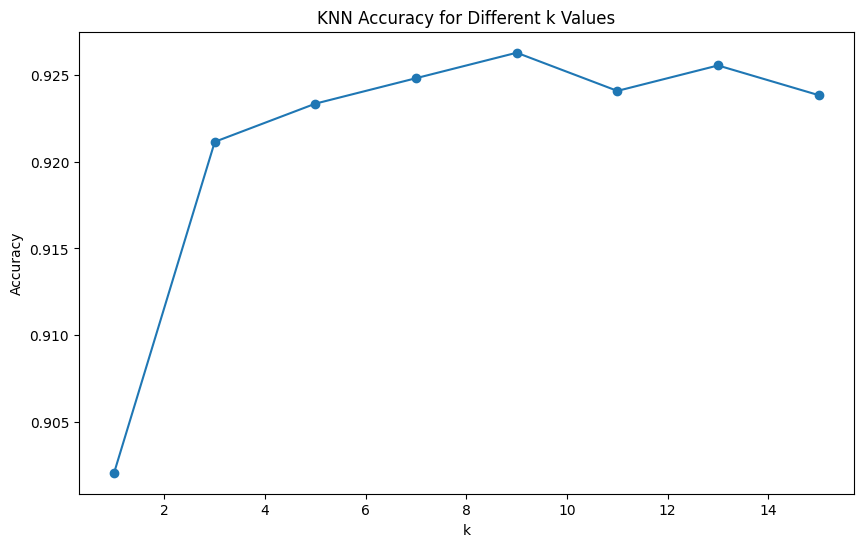

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ks, accuracy_per_k, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Using the best k value for final evaluation

In [ ]:
best_k = ks[np.argmax(accuracy_per_k)]
y_pred = knn_predict(X_train_scaled, y_train, X_test_scaled, best_k)

# Function for classification report(consists of Precision, Recall, F1-score)

In [ ]:
def classification_report(y_true, y_pred):
    unique_classes = np.unique(y_true)
    report = ""
    for cls in unique_classes:
        tp = np.sum((y_true == cls) & (y_pred == cls))
        fp = np.sum((y_true != cls) & (y_pred == cls))
        fn = np.sum((y_true == cls) & (y_pred != cls))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        report += f"Class {cls}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}\n"
    return report

# Function for confusion matrix

In [ ]:
def confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(y_true)
    matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    return matrix

# Displaying both classification report and confusion matrix

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
 Class 0: Precision: 0.97, Recall: 0.90, F1-score: 0.94
Class 1: Precision: 1.00, Recall: 1.00, F1-score: 1.00
Class 2: Precision: 0.93, Recall: 0.97, F1-score: 0.95
Class 3: Precision: 0.91, Recall: 0.92, F1-score: 0.91
Class 4: Precision: 0.97, Recall: 0.96, F1-score: 0.97
Class 5: Precision: 0.95, Recall: 0.93, F1-score: 0.94
Class 6: Precision: 0.86, Recall: 0.87, F1-score: 0.86

Confusion Matrix:
 [[ 348    0   23    0    2    4    8]
 [   0  167    0    0    0    0    0]
 [   6    0  439    0    4    0    3]
 [   0    0    0 1027    5   17   70]
 [   0    0    8    3  582    0   11]
 [   1    0    0   17    1  550   20]
 [   3    0    2   79    8    6  670]]


# Visualize the confusion matrix in pictorial format

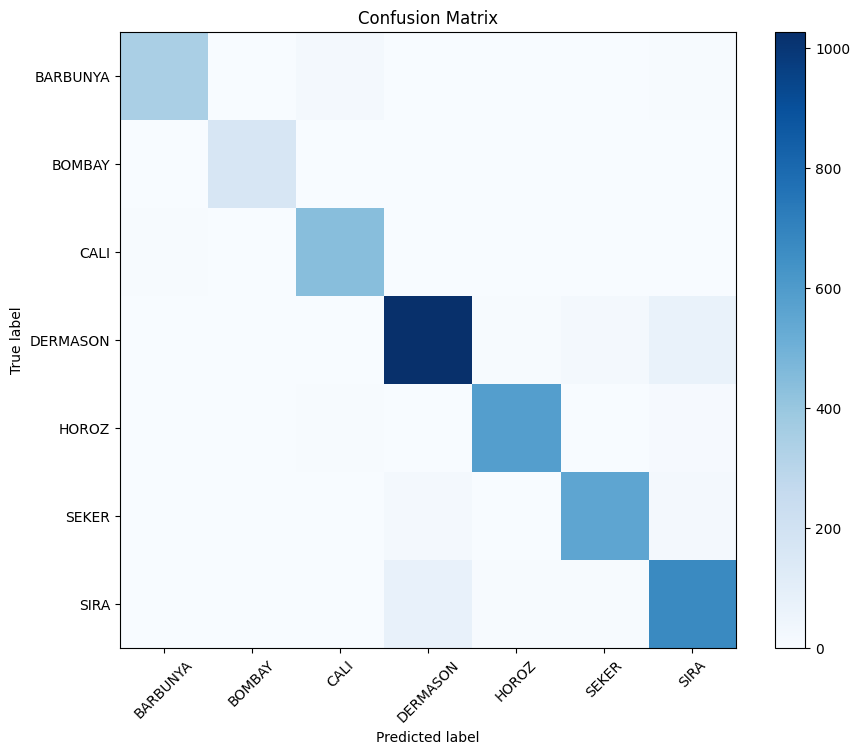

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_mapping))
plt.xticks(tick_marks, class_mapping.keys(), rotation=45)
plt.yticks(tick_marks, class_mapping.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Visualizing the confusion matrix in much more detailed way

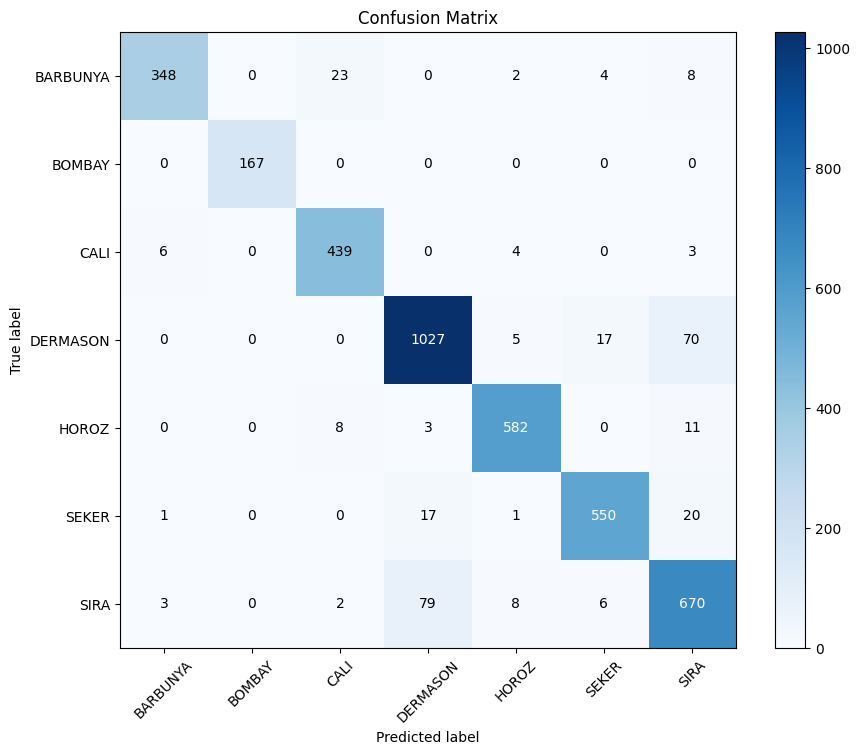

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_mapping))
plt.xticks(tick_marks, class_mapping.keys(), rotation=45)
plt.yticks(tick_marks, class_mapping.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')

thresh = cm.max() / 2
for i in range(len(class_mapping)):
    for j in range(len(class_mapping)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.show()

# Testing on Sample Data from the Same Dataset


In [ ]:
sample_indices = np.random.choice(len(X_test), size=5, replace=False)
sample_data = X_test[sample_indices]
sample_data_scaled = (sample_data - mean) / std

# Predicting on sample data

In [ ]:
sample_predictions = knn_predict(X_train_scaled, y_train, sample_data_scaled, k=best_k)

# Converting these predictions back to original class labels

In [ ]:
inverse_class_mapping = {v: k for k, v in class_mapping.items()}
sample_predictions_labels = [inverse_class_mapping[pred] for pred in sample_predictions]
actual_labels = [inverse_class_mapping[true] for true in y_test[sample_indices]]

# Displaying the final predictions

In [ ]:
print("Predictions for sample data:\n", sample_predictions_labels)
print("Actual classes for sample data:\n", actual_labels)

Predictions for sample data:
 ['BOMBAY', 'DERMASON', 'DERMASON', 'SEKER', 'SIRA']
Actual classes for sample data:
 ['BOMBAY', 'DERMASON', 'DERMASON', 'SEKER', 'DERMASON']
